In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
filepath="/kaggle/input/heart-disease-dataset/heart.csv"
df=pd.read_csv(filepath)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

Text(0.5, 1.0, 'Hear-disease distribution')

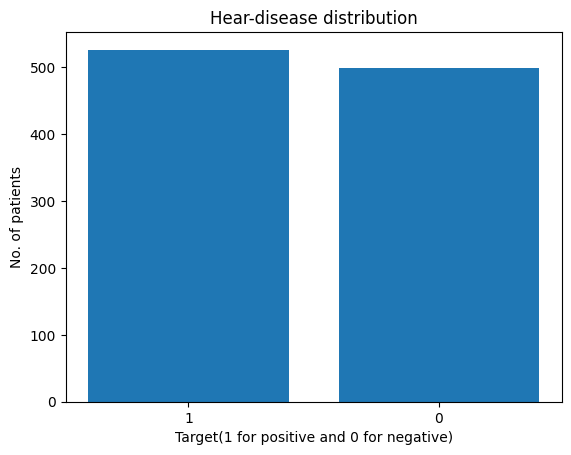

In [4]:
target_count=df['target'].value_counts()
plt.bar(target_count.index.astype(str),target_count.values)
plt.xlabel('Target(1 for positive and 0 for negative)')
plt.ylabel('No. of patients')
plt.title('Hear-disease distribution')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
X=df.drop(columns='target')
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000000)

In [7]:
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"Test accuracy: {acc:.2%}")

Test accuracy: 79.51%


In [8]:
import joblib

# save the trained model
joblib.dump(model, 'heart_model.pkl')

loaded = joblib.load('heart_model.pkl')
sample = X_test.iloc[[0]]          # first test row
print("Sample input:", sample.values)
print("True label  :", y_test.iloc[0])
print("Model says  :", loaded.predict(sample)[0])

Sample input: [[ 62.   0.   0. 124. 209.   0.   1. 163.   0.   0.   2.   0.   2.]]
True label  : 1
Model says  : 1
